# ADS Homework #1
Monday 2-5pm Session, Proffessor Tim Savage

Please submit this assignment to the NYU Classes 'Assignments' section by 12:00pm on Monday, October 1, strictly labeling the assignments with the format **'ADS_HW1_(your net ID).ipynb'**. Be sure not to confuse Net ID (e.g. 'acs882') with N-number ('N166...'). This homework is here for you to better understand and practice the material; while you may discuss approaches to problems with your classmates (in fact, this is encouraged!), please ensure that all final code submitted is your own. You may reach out to the TA, Alex Shannon, at acs882@nyu.edu at anytime (he hangs out at CUSP a lot, so feel free to say hello). Additionally, Professor Savage will hold office hours on Mondays from 9am-12am; a location for this will be confirmed and communicated shortly.

### Problem 1 - Probability (30 points)

Let's look at some basic probability simulations and how Python can be used as a tool to generate and evaluate probabilistic events.

**1.1)** Use the *numpy* or *random* library to generate a pair of six-sided dice. Simulate 100,000 roles of the dice, adding the two numbers together. Plot a histogram of the counts for each sum recorded. Caption the figure with any observations you may have (be sure to include a title); if you are unsure, make an educated gauss... er, I mean guess. (10 points)

In [119]:
import matplotlib.pyplot as plt
import numpy as np
import random
random.seed(42)
%matplotlib inline
from sklearn import datasets, linear_model
from sklearn.metrics import r2_score
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sma
from statsmodels.graphics.api import abline_plot
import pandas as pd

/nfshome/yw1665/.conda/envs/myEnv/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(1, 6 + 1) instead
  """Entry point for launching an IPython kernel.
/nfshome/yw1665/.conda/envs/myEnv/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: This function is deprecated. Please call randint(1, 6 + 1) instead
  


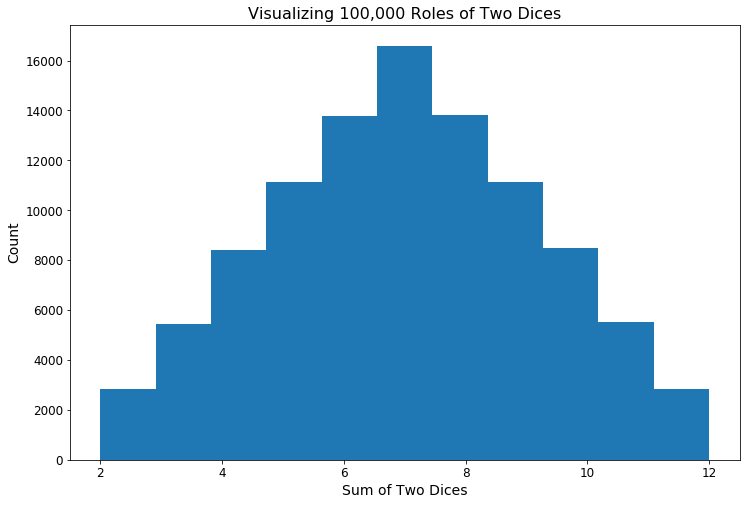

In [120]:
dice1 = np.random.random_integers(1, 6, 100000)
dice2 = np.random.random_integers(1, 6, 100000)

dice_sum = dice1 + dice2
plt.figure(figsize = (12,8))
plt.hist(dice_sum, bins=11)
plt.title('Visualizing 100,000 Roles of Two Dices', fontsize = 16)
plt.xlabel('Sum of Two Dices', fontsize = 14)
plt.ylabel('Count',fontsize = 14)
plt.tick_params(labelsize=12)

Figure 1. The histogram of 100,000 roles of two dices is normal distribution, which reflecting the central limit theorem.

**1.2)** Using *x* and *y* provided below, plot the data and answer the following questions. (20 points total)

In [121]:
x = range(20)
y = [14.0, 12.0, 18.0, -4.0, 14.0, 35.0, 45.0, 30.0, 50.0, 54.0, 58.0, 
     55.0, 57.0, 62.0, 61.0, 83.0, 85.0, 106.0, 105.0, 104.0]

(a) Calculate corr(x,y) and provide a brief description of what this tells us. (5 points)

In [122]:
print (np.corrcoef(x,y))

[[1.         0.95630101]
 [0.95630101 1.        ]]


The matrix has two different numbers. 1 means each data is completly correlated to itself. 0.956 means the two different data are highly correlated to each other.

(b) Generate a scatter plot of the data. Be sure to include a title and caption. (5 points)

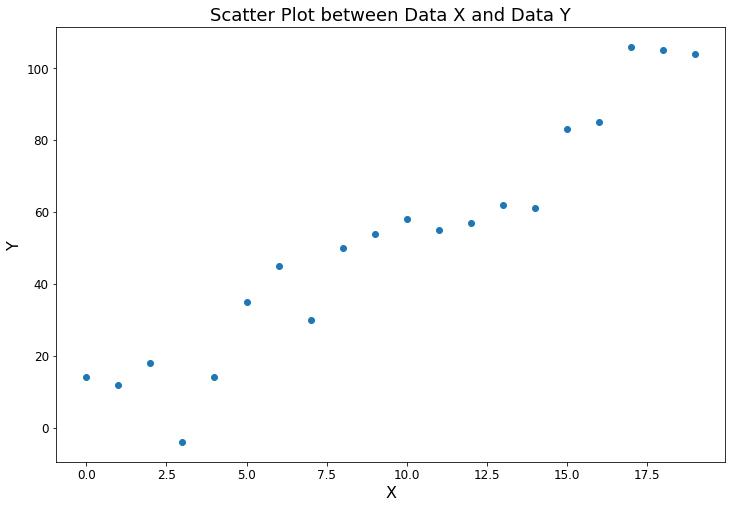

In [123]:
plt.figure(figsize = (12,8))
plt.scatter(x,y)
plt.title("Scatter Plot between Data X and Data Y", fontsize = 18)
plt.xlabel("X", fontsize = 16)
plt.ylabel("Y", fontsize = 16)
plt.tick_params(labelsize=12)

Figure 2. The scatter plot between list x and list y shows there's positive correlation between X and Y, which means the greater the X, the greater the Y. 

(c) There's obviously some linear correlation going on here... using the *statsmodels* or *sklearn* libraries, fit a line to the data and plot this on the scatter plot generated in *b*. In the caption, be sure to discuss the R-squared value for the fit. (10 points)

R-square: 0.91


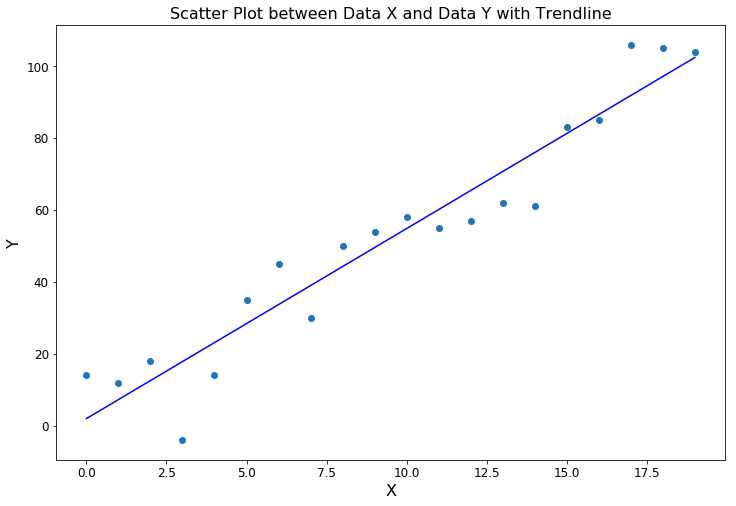

In [124]:
model = linear_model.LinearRegression()
y = [int(i) for i in y]
x = np.asarray(x)
y = np.asarray(y)
x = x.reshape(-1,1)
model.fit(x,y)
predict = model.predict(x)
print('R-square: %.2f' % r2_score(y, predict))
plt.figure(figsize = (12,8))
plt.scatter(x,y)
plt.plot(x,predict,color='blue')
plt.title("Scatter Plot between Data X and Data Y with Trendline", fontsize = 16)
plt.xlabel("X", fontsize = 16)
plt.ylabel("Y", fontsize = 16)
plt.tick_params(labelsize=12)

Figure 3. The trendline shows this simple liner regression fits the data well. The R-squre of this model is 0.91, which means 91% of the variation of Y can be explained by X. 

### Problem 2 (35 Points)

You are staring out the window from the 13th story of CUSP, looking on as people bustle about Jay Street; some head to the subway, others wait in line for street food, and yet others seem to wander around aimlessly. You don't know or care about what they are doing or where they are going. The one thing that you do know for certain is that none of them were born on a leap-day (February 29th). You also have recently found a dataset on subway ridership in NYC in which people have self-reported their birthdays. 

Because you are a data scientist, you begin to wonder... 'What is the likelihood that any one of them shares my birthday?' Knowing that, due to a variety of reasons, real-life births are not evenly distributed throughout the year, you decide to dig into the dataset to see if you can uncover trends in what time of year people are born. The dataset, unfortunately is a little messy, due to a poor user-interface, but with a bit of cleaning, should be fine to use. Let's take a closer look at the 'births.csv' dataset.

In [125]:
birthdays = pd.read_csv('birthdays.csv') # make sure file is in same folder as notebook
birthdays.index = birthdays.index + 1   
birthdays.index.name = 'day_of_year'

birthdays.head()

,month,day,births,subway_ridership
day_of_year,,,,
1,1,1,160369,46.763549
2,1,2,169896,38.745642
3,1,3,180036,42.628351
4,1,4,182854,38.160858
5,1,5,184145,2.195034


* **'day_of_year'** describes the day of the year from January 1. <br>
* **'births'** describes the number of births that users registered for a given date <br>
* **'subway_ridership'** describes the average reported subway ridership (rides/month) for people born on that day.

2.1) First plot the birthday data (ignore subway ridership for now) and see if there are any patterns. If so, what are they? Include a description below your plot describing your observations and possible explainations - these observations can just be hypotheses, and do not have to be correct. (10 points)

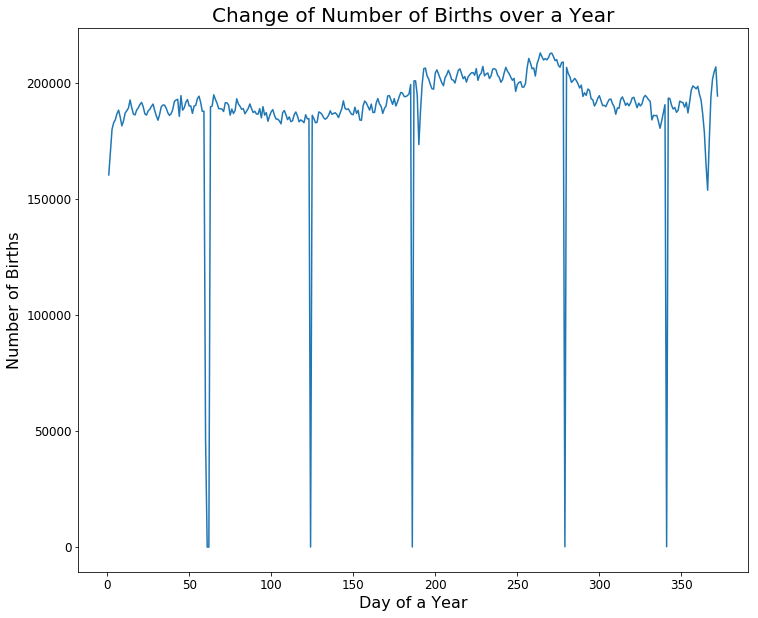

In [126]:
plt.figure(figsize = (12,10))
plt.title('Change of Number of Births over a Year',fontsize=20)
plt.plot(birthdays['births'])
plt.xlabel('Day of a Year',fontsize=16)
plt.ylabel('Number of Births',fontsize=16)
plt.tick_params(labelsize=12)

Figure 4. There are two observations: 
1. The number of births drops significantly in some days approximately every two months (End of February, April, June, September, and November).
2. The number of births increases from approximately day 125 (May) to approximately day 270 (september). This trend may due to people are more willing to give birth during summer. 

2.2) You should notice an issue in the data that you have plotted. Taking a glance at the raw datapoints should provide the answer. Please make note of what the issue is, and print the first 65 rows of a cleaned-up dataset. (15 points)

Some observations have date out of the range of its month. For example, there's 2/30, and 2/31, which actually do not exist.

In [127]:
birthdays.drop([60,61,62,124,186,279,341],inplace=True)
birthdays.head(65)

,month,day,births,subway_ridership
day_of_year,,,,
1,1,1,160369,46.763549
2,1,2,169896,38.745642
3,1,3,180036,42.628351
4,1,4,182854,38.160858
5,1,5,184145,2.195034
6,1,6,186726,16.720587
7,1,7,188277,5.829813
8,1,8,185186,45.891352
9,1,9,181511,14.486921


3.3) Plot the data again, and use the 'sort_values' method to examine high and low points. Do you notice anything about overall trends in births by time of year? Do any specific dates stand out? (10 points)

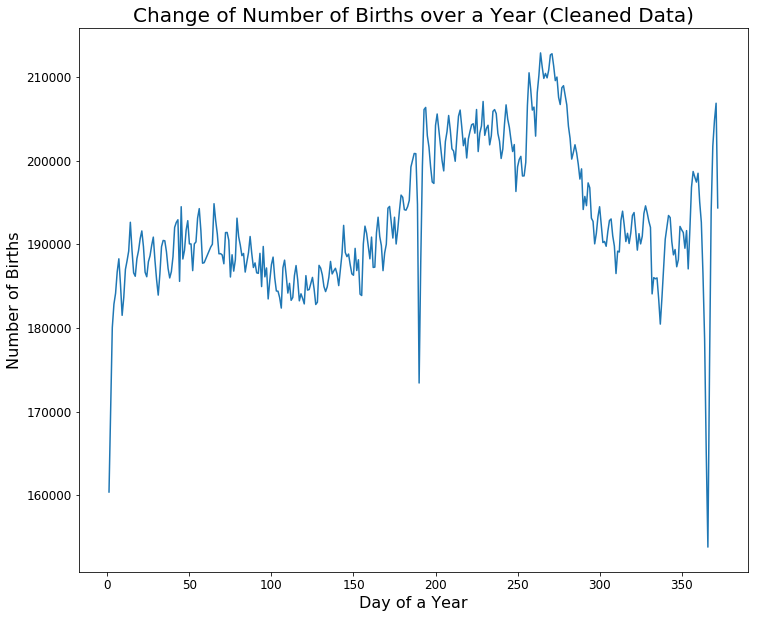

In [128]:
plt.figure(figsize = (12,10))
plt.plot(birthdays['births'])
plt.title('Change of Number of Births over a Year (Cleaned Data)',fontsize=20)
plt.xlabel('Day of a Year',fontsize=16)
plt.ylabel('Number of Births',fontsize=16)
plt.tick_params(labelsize=12)

Figure5. The plot of cleaned data also shows the trend that the number of birth goes up during the summer, from earily May to earily September, and then goes down during the autumn and winter, from September to November.

In [131]:
birthdays.sort_values(by=['births'], ascending=False).head(10)

,month,day,births,subway_ridership
day_of_year,,,,
264,9,16,212915,112.238375
271,9,23,212817,109.776003
270,9,22,212673,30.021288
272,9,24,211362,51.217376
265,9,17,211263,115.199838
269,9,21,210876,14.123683
257,9,9,210536,97.511130
267,9,19,210460,43.893268
263,9,15,210214,81.113284


In [132]:
birthdays.sort_values(by=['births'], ascending=True).head(10)

,month,day,births,subway_ridership
day_of_year,,,,
366,12,25,153778,57.497671
1,1,1,160369,46.763549
365,12,24,165050,109.870765
2,1,2,169896,38.745642
190,7,4,173413,58.183340
367,12,26,175341,109.450518
364,12,23,178667,56.755423
3,1,3,180036,42.628351
337,11,27,180462,22.075020


Two two table also confirms that September is the most popular month for giving birth, and it also shows December and January are less popular for giving birth.

### Problem 3 (35 Points)

Now that you've got clean data, you're curious... are people traveling on the subway more likely to have certain birthdays than others? A friend next to you makes the dubious claim that people born later in the year tend to ride the subway more often. You don't believe her, but want to use your data science skills to show that she's wrong (or to discover that you're wrong! Which is notably one of the most exciting experiences in the field of data science). You decide to test her claim armed with your newly-cleaned data and linear regression.

3.1) State the null hypothesis. (5 points)

$H_0$: $N_0=N_1$ (The subway ridership of people born later is the same with people who born earlier.) 

$H_1$: $N_0 > N_1$ (The subway ridership of people born later is greater than people who born earlier.)

$\alpha$ = 0.05

3.2) Generate a scatter plot with subway ridership (the dependant variable) on the y-axis and birthday (as day of year) (the independant variable) on the x-axis. Fit a regression line to the data. (15 points)

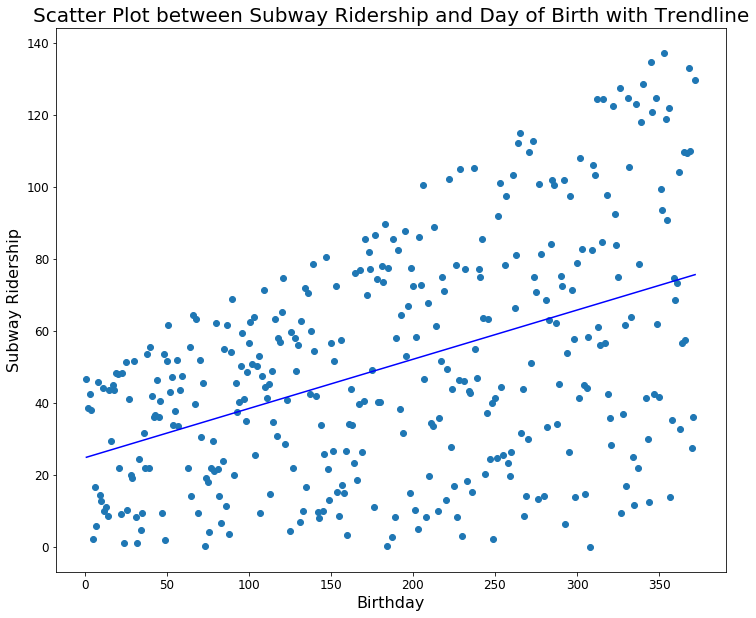

In [135]:
#plt.scatter(x=birthdays.index, y = birthdays.subway_ridership)
#model.fit(birthdays.index, birthdays.subway_ridership)
x = np.asarray(birthdays.index)
y = np.asarray(birthdays.subway_ridership)
x = x.reshape(-1,1)
model.fit(x,y)
predict = model.predict(x)
plt.figure(figsize = (12,10))
plt.scatter(x=birthdays.index, y = birthdays.subway_ridership)
plt.plot(x,predict,color='blue')
plt.title('Scatter Plot between Subway Ridership and Day of Birth with Trendline',fontsize=20)
plt.xlabel('Birthday',fontsize=16)
plt.ylabel('Subway Ridership',fontsize=16)
plt.tick_params(labelsize=12)

Figure 6. The trend lines shows Subway Ridership and Birthday are positivly correlated.

3.3) Print the summary statistics of your regression and discuss if your results confirm or reject the null hypothesis at a p-value of 0.05. Discuss the possible implications of Type 1 & Type 2 errors and the choice of a 0.05 p-value. (15 points)

In [96]:
birthdays['day_year'] = birthdays.index
mod = smf.ols(formula='subway_ridership ~ day_year', data = birthdays).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:       subway_ridership   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     94.53
Date:                Mon, 24 Sep 2018   Prob (F-statistic):           5.20e-20
Time:                        18:19:22   Log-Likelihood:                -1743.9
No. Observations:                 365   AIC:                             3492.
Df Residuals:                     363   BIC:                             3500.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.8695      3.032      8.201      0.0

Because the p value 0.000 < 0.05, we reject the null hypothesis. People born later in the year tend to ride the subway more often.

Type 1 Error: We reject the ture null hypothesis, that people born later in the year actually do not tend to ride the subway more often.

Type 2 Error: We accept the false null hypotheis, that people born later in the year actually tend to ride the subway more often.

P-value = 0.05: 
1. The probability of getting a extreme result to be less then 5%
2. The probability of making type 1 error is 0.05 (p-value). 